# GRIP: The Sparks Foundation(Data Science & Business Analytics Internship)

# Author: Sneha Arya

## Task6 - Prediction Using Decision Tree Algorithm

#### For the given ‘Iris’ dataset, we create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Loading dataset

In [2]:
df=pd.read_csv("Iris.csv")
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# To find total_missing_values in different columns of data and their percentage


def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= df)

,Total,Percent
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


In [6]:
# To find descriptive statistic summary on the data I used function below:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### To plot multiple pairwise bivariate distributions in a dataset. The pairplot() function shows the relationship for (n,2) combination of variable in a Dataframe as a matrix of plots and the diagonal plots are univariate plots.

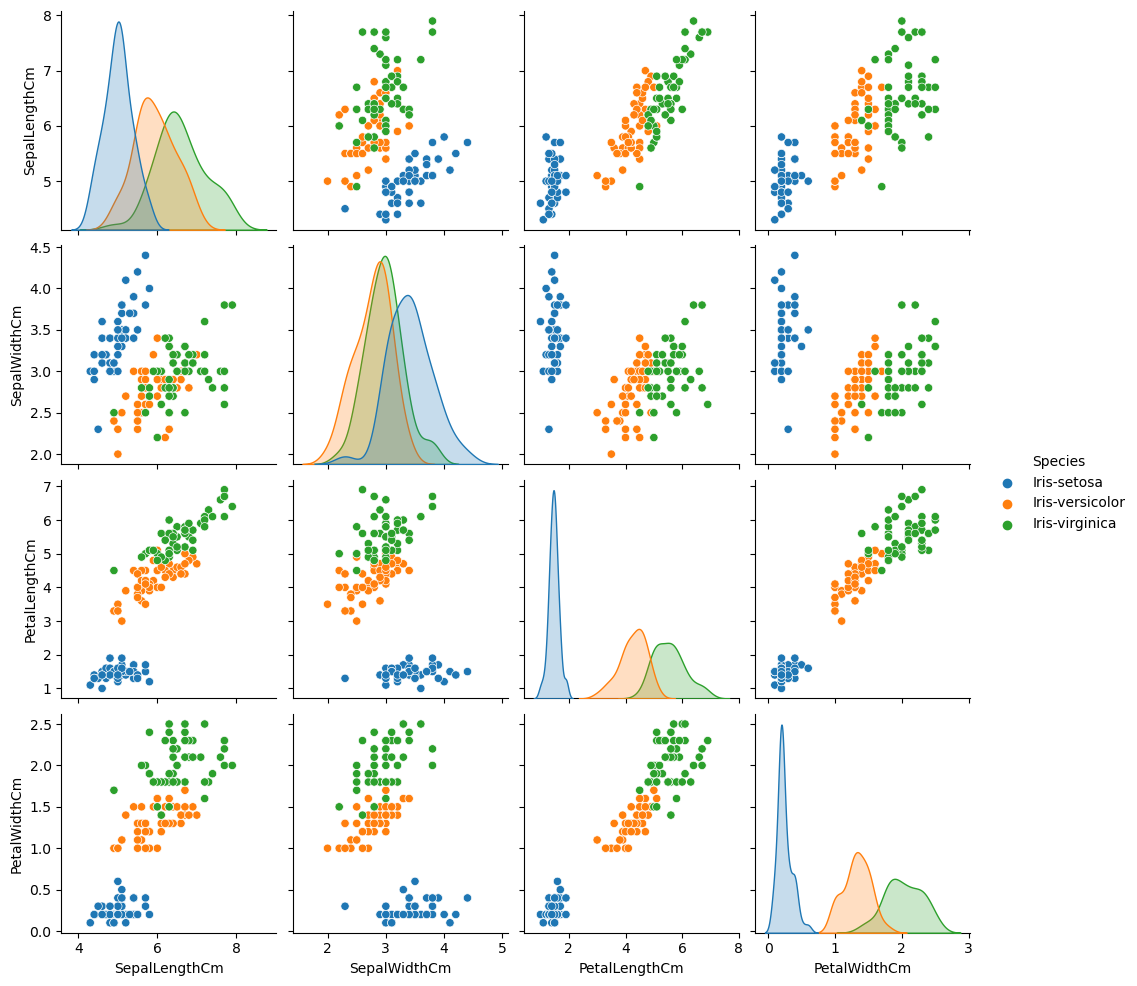

In [7]:
df.drop("Id",axis=1,inplace=True)
sns.pairplot(df,hue="Species")

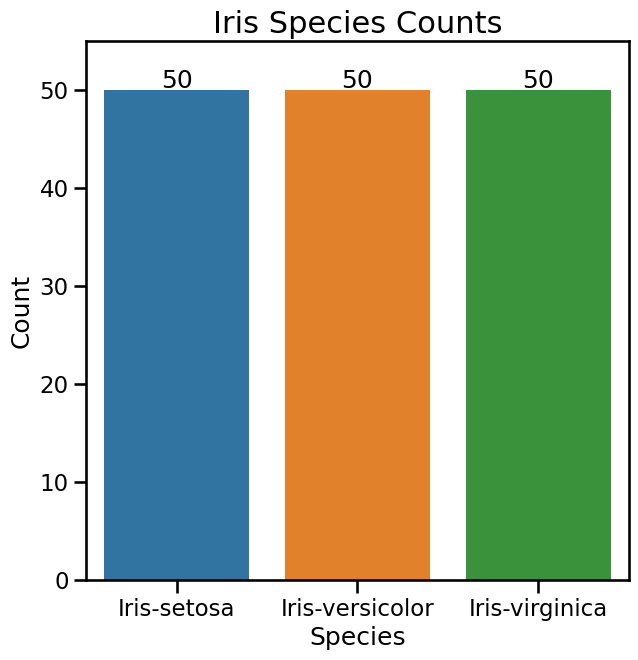

In [8]:
plt.figure(figsize=(7,7))
sns.set_context("talk")

iris_species = df['Species'].value_counts()
sns.countplot(data = df, x = 'Species', order = iris_species.index)
plt.xlabel('Species')
plt.ylabel('Count')
plt.ylim(0,55)
plt.title('Iris Species Counts', fontsize=22)

for i in range(iris_species.shape[0]):
    count = iris_species[i]
    strt='{}'.format(count)
    plt.text(i,count + 0.2, strt, ha='center')

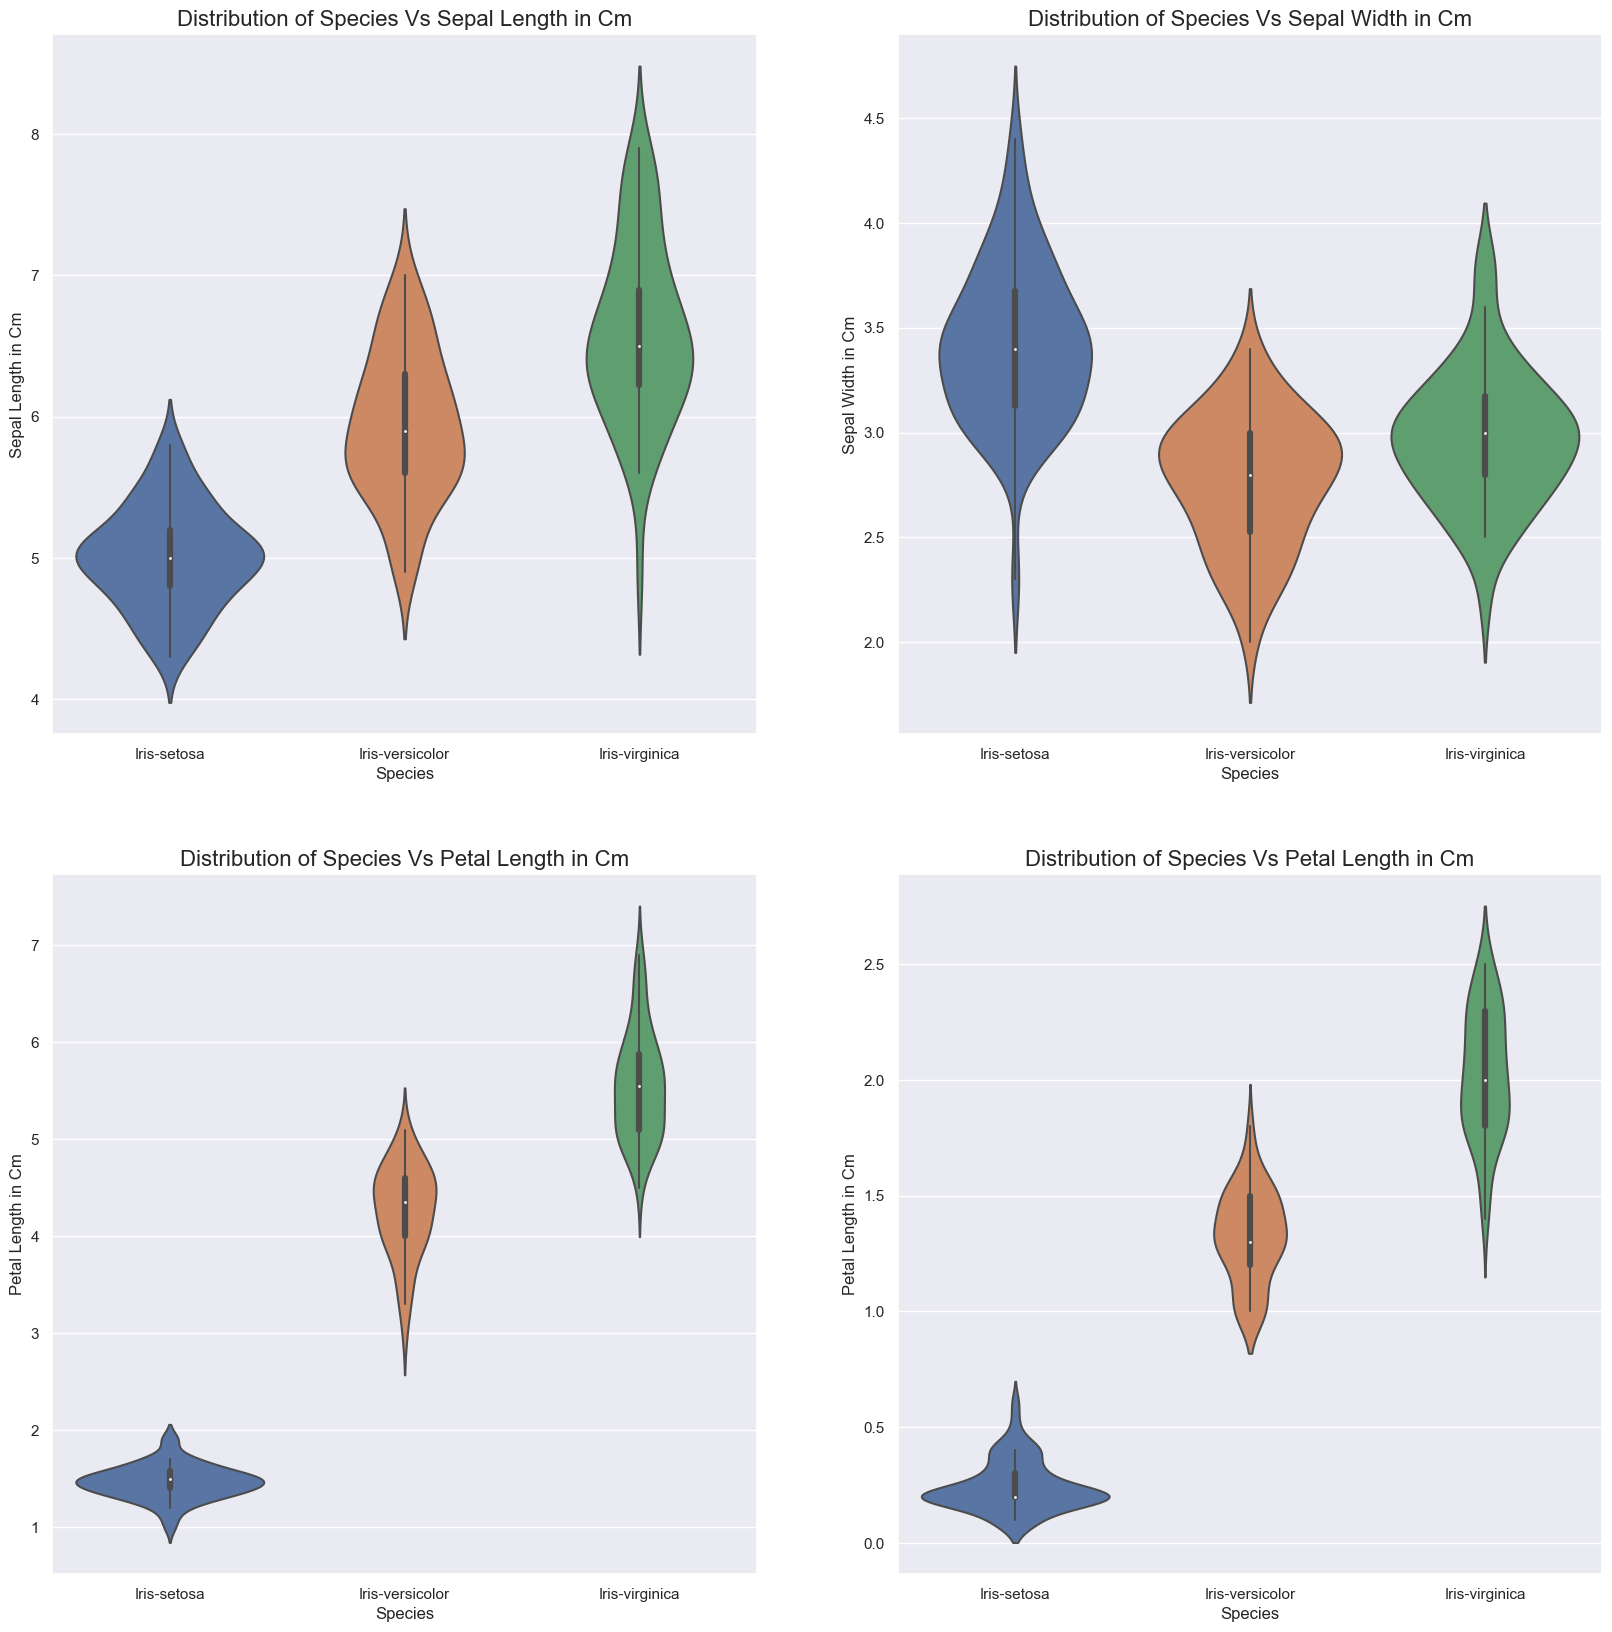

In [9]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= df, x= 'Species', y= 'SepalLengthCm', ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Species Vs Sepal Length in Cm', fontsize=16)
ax0.set(xlabel= 'Species', ylabel= 'Sepal Length in Cm')

# Subplot 2: Distribution plot of 'Species Vs Sepal Length in Cm'
k2 = sns.violinplot(data= df, x= 'Species', y= 'SepalWidthCm', ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Species Vs Sepal Width in Cm', fontsize=16)
ax1.set(xlabel= 'Species', ylabel= 'Sepal Width in Cm')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= df, x= 'Species', y= 'PetalLengthCm', ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Species Vs Petal Length in Cm', fontsize=16)
ax2.set(xlabel= 'Species', ylabel= 'Petal Length in Cm')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length in Cm'
k1 = sns.violinplot(data= df, x= 'Species', y= 'PetalWidthCm', ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Species Vs Petal Length in Cm', fontsize=16)
ax3.set(xlabel= 'Species', ylabel= 'Petal Length in Cm')

plt.show()

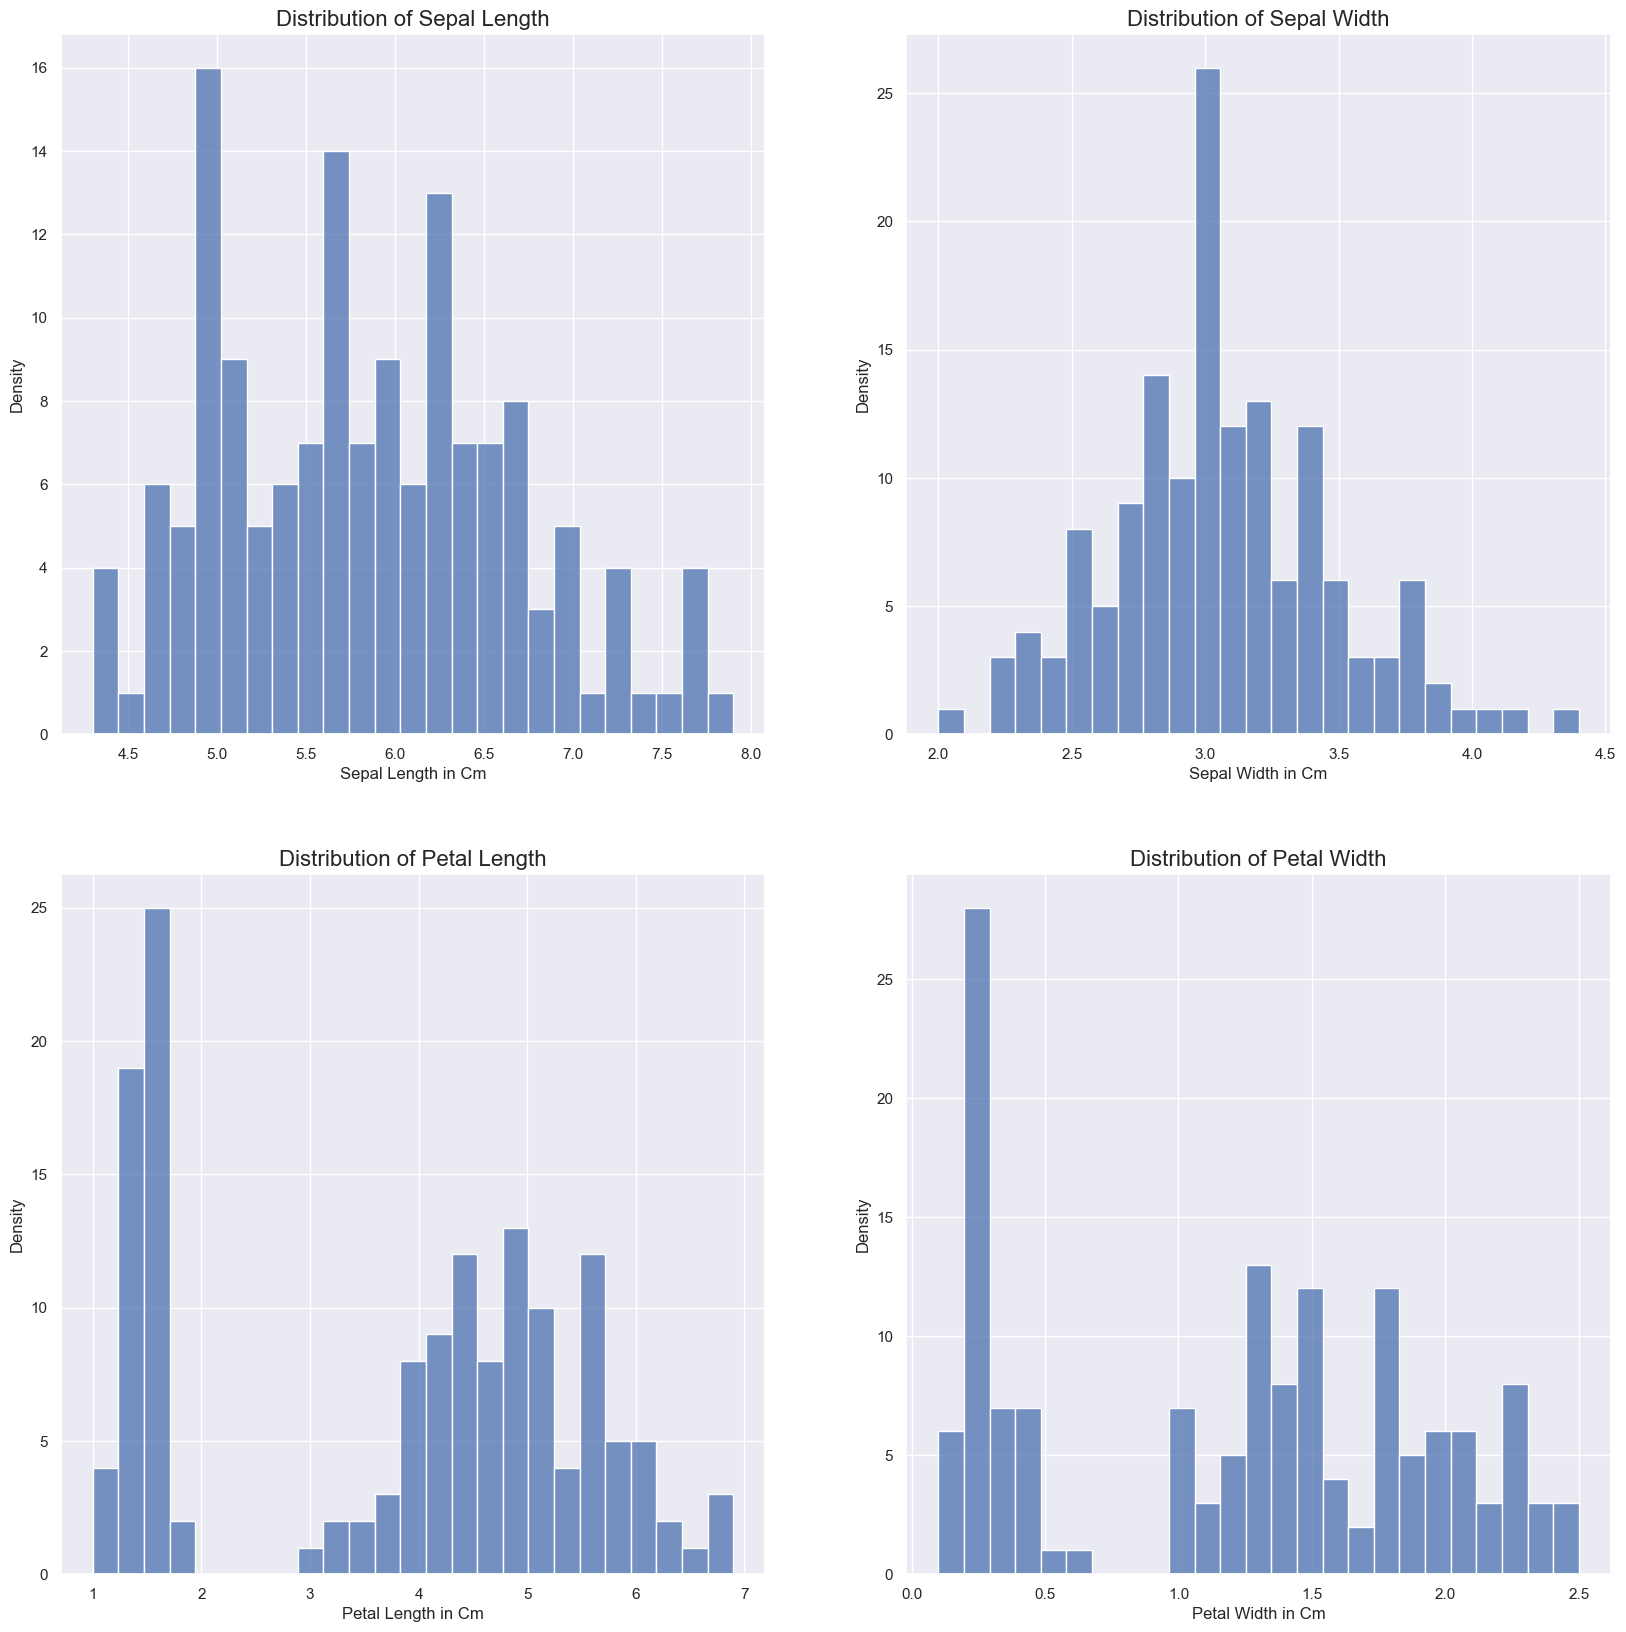

In [10]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'SepalLengthCm' feature
k1 = sns.histplot(df['SepalLengthCm'], bins=25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Sepal Length', fontsize=16)
ax0.set(xlabel= 'Sepal Length in Cm', ylabel= 'Density')

# Subplot 2: Distribution plot of 'SepalWidthCm' feature
k2 = sns.histplot(df['SepalWidthCm'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Sepal Width', fontsize=16)
ax1.set(xlabel= 'Sepal Width in Cm', ylabel= 'Density')

# Subplot 1: Distribution plot of 'PetalLengthCm' feature
k1 = sns.histplot(df['PetalLengthCm'], bins=25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Petal Length', fontsize=16)
ax2.set(xlabel= 'Petal Length in Cm', ylabel= 'Density')

# Subplot 1: Distribution plot of 'PetalWidthCm' feature
k1 = sns.histplot(df['PetalWidthCm'], bins=25, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Petal Width', fontsize=16)
ax3.set(xlabel= 'Petal Width in Cm', ylabel= 'Density')

plt.show()

In [11]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
# Defining the decision tree algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [13]:
#Splitting data into training and testing data

x=df.drop('Species',axis=1)
y=df.Species

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) 

In [15]:
#Creating classifier and training it on train data

dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [16]:
#Predicting on test data

pred_X=dtree.predict(X_test)
pred_X

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [17]:
#Accuracy 

dtree.score(X_test,y_test)

0.9555555555555556

In [18]:
X, y = load_iris(return_X_y=True)

In [19]:
# Make an instance of the Model

clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

### Tree Visualization

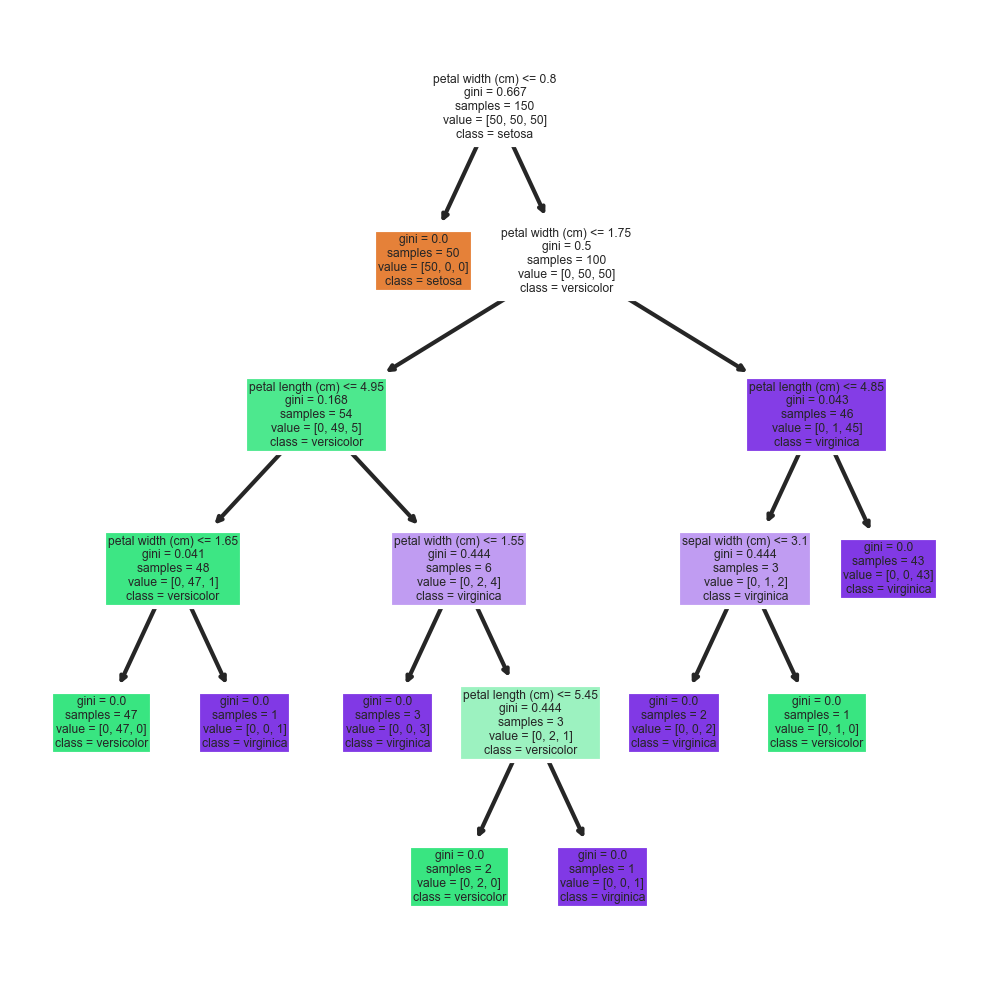

In [20]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']


# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)


tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);